# MADS01  An example of Exploratory Data Analysis

## The Iris Dataset

Notebook MADS01 presents a example of Exploratory Data Analysis (EDA for short). EDA is the main theme of the Unit of Study 1 of the MADS curriculum. 

What's EDA? According to Wikipedia, EDA is an approach of analyzing datasets to summarize their main characteristics, often using statistical graphics and other data visualization methods. A statistical model can be used or not, *but primarily EDA is for seeing what the data can tell us beyond the formal modeling* and thereby contrasts traditional hypothesis testing. Exploratory data analysis has been promoted by John Tukey since 1970 to encourage statisticians to *explore* the data, *and* possibly *formulate hypotheses* that could lead to new data collection and experiments. EDA is different from initial data analysis (IDA), which focuses more narrowly on checking assumptions required for model fitting and hypothesis testing, and handling missing values and making transformations of variables as needed. EDA *encompasses* IDA.

Technically the process starts with importing the data into the analysis environment. Usually the data is not shaped in such a way that it is fit for analytical purposes. Tidying and transforming the data (aka "data wrangling") prepares it for visualization and modeling. Usually both the quality and the shape of the data is far from optimal. In real life use cases the wrangling process is difficult and extremely labour intensive.      
![EDA](EDAProces.png "EDA Steps")

<b>Bronvemelding toevoegen.</b>



This example makes use of a very well known data set called the Iris data set. For didactical reasons the original data has been compromized structurally and qualitatively. 

The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper "The use of multiple measurements in taxonomic problems". It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters (sepal = one of the usually separate, green parts that surround and protect the flower bud, petal = one of the usually ring of brightly colored petals surrounding the center part of the blossom). This dataset became a typical test case for many statistical classification techniques in machine learning.

Content
The dataset contains a set of 150 records under 5 attributes - Petal Length, Petal Width, Sepal Length, Sepal width and Class(Species).

Acknowledgements
This data set is free and is publicly available at the UCI Machine Learning Repository.

In [1]:
# First setting is a so called magic command specifying that figures produced
# by matplotlib, should be printed inline in the notebook cell
%matplotlib inline

## Import Data
The first thing to do if you want to explore data is to import the data into the analysis environment. In this case the dataset is simple and small. It's stored in comma separated file format in a text file. Python pandas offers a host of functions allowing you to import data of various formats. Real life use cases usually require quite a bit of work to import and integrate the datasets into a useful analytical structure.    

In [116]:
# First import the package pandas containing functions allowing us to import
# data in various formats (csv, excel, json, xml, etc)
import pandas as pd

# Read iris data stored in a comma separated value file called iris_dirty
# into variable iris
iris = pd.read_csv('../data/iris_dirty.csv')
# Show 10 example rows to get a first impression of the data
iris.head(10)

,5.1,3.5,1.4,2 mm,Iris-setosa
0,4.9,3.0,1.4,2 mm,Iris-setosa
1,4.7,3.2,1.3,2 mm,Iris-setosa
2,4.6,3.1,1.5,2 mm,Iris-setosa
3,5.0,3.6,1.4,2 mm,Iris-setosa
4,5.4,3.9,1.7,4 mm,Iris-setosa
5,4.6,3.4,1.4,3 mm,Iris-setosa
6,5.0,3.4,1.5,2 mm,Iris-setosa
7,4.4,2.9,1.4,2 mm,Iris-setosa
8,4.9,3.1,1.5,1 mm,Iris-setosa
9,5.4,3.7,1.5,2 mm,Iris-setosa


In [115]:
# The data structure iris created on importing the csv file is called a 
# dataframe. A dataframe comes close to what in a relational database 
# environment is called a table (more formal it is not a table but a mathematical 
# relation: that's why we call these type of databases relational databases). 

# Already see some problems?

# For one thing,it doesn't contain a header with feature/variable names. 
# Without a header you just don't know what kind of data you're looking at.

# There's more though. Do you see more?

In [16]:
# Run the code in this cel. The names parameter lists the features names in 
# the right order fitting the data in the columns.

iris = pd.read_csv('../data/iris_dirty.csv', 
                   header = None, 
                   names = ['sepal length', 'sepal width', 'petal length', 
                            'petal width', 'class'])
iris

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,2 mm,Iris-setosa
1,4.9,3.0,1.4,2 mm,Iris-setosa
2,4.7,3.2,1.3,2 mm,Iris-setosa
3,4.6,3.1,1.5,2 mm,Iris-setosa
4,5.0,3.6,1.4,2 mm,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,23 mm,Iris-virginica
147,6.3,2.5,5.0,19 mm,Iris-virginica
148,6.5,3.0,5.2,20 mm,Iris-virginica
149,6.2,3.4,5.4,23 mm,Iris-virginica


In [117]:
# Let's produce some summary statistics by executing the instance method 
# describe(). 
iris.describe()

,5.1,3.5,1.4
count,150.000000,149.000000,150.000000
mean,6.204000,3.054362,3.780667
std,4.337876,0.432698,1.755364
min,4.300000,2.000000,1.000000
25%,5.100000,2.800000,1.600000
50%,5.800000,3.000000,4.400000
75%,6.400000,3.300000,5.100000
max,58.000000,4.400000,6.900000


In [18]:
# Notice anything strange? First of all some columns seem to be missing ("class" 
# and "petal width"). The reason is simply that for non numerical columns 
# another kind of summary statistics applies. The two numerical
# columns are included by default.

# The count row should report 150 elements (see description of the Iris data 
# set at the top of this notebook).

iris["petal width"].describe()

count      151
unique      22
top       2 mm
freq        28
Name: petal width, dtype: object

In [19]:
# Let's also produce the summary statistics for the column containing the "class" feature. 
iris["class"].describe()
# Besides the count problem we already identified, unique shows us that the set of class 
# values contains four unique values (which is one too many!).  

count                 151
unique                  4
top       Iris-versicolor
freq                   51
Name: class, dtype: object

In [20]:
# It looks as if a value is actually missing for sepal width. We can use a 
# pandas function: isnull(). The function retutrns true or false values per 
# iris row consisting of in this case one column value ('sepal width'):
# iris['sepal width'].isnull()
# The array of logicals (booleans) can be used to extract from the iris set 
# each row for which a value true has been generated.
iris[iris['sepal width'].isnull()]

,sepal length,sepal width,petal length,petal width,class
82,5.8,NaN,3.9,12 mm,Iris-versicolor


In [24]:
# Pandas indicates that a value is missing by returning Nan (Not a Number).
# Missingness of data in real use case datasets is a very common problem. 
# Especially in cases where data has been collected with different use in mind
# than using it in for data science, quality issues like missingness are the 
# norm, not the exception. 

# Imputation is the technique of generating replacement data. For now we 
# "solve" the problem by placing the mean of column 'sepal width' of species 
# versicolor in the empty slot. Sometimes this is an acceptable strategy 
# (but usually it is not).

iris_versicolor = iris[iris['class'] == 'Iris-versicolor']
meanSepalWidth = pd.Series.mean(iris_versicolor['sepal width'])
meanSepalWidth

2.78

In [25]:
# We can use the loc(ation) label 82 to specify which row to target. Dataframes have an index which by default 
# contains the sequence number of the row (starting at 0). So actually physical
# row 83 is missing its "sepal width" value.
iris.loc[82,'sepal width'] = meanSepalWidth
iris.loc[82]

sepal length                5.8
sepal width                2.78
petal length                3.9
petal width               12 mm
class           Iris-versicolor
Name: 82, dtype: object

In [26]:
# Another problem is duplication of data caused by errors. Duplication of data 
# could be a plain fact of life given the domain, but in case errors like fi 
# typos caused duplication, we should solve it.
# Pandas has a nice function to find duplicates. We can use the summary 
# statistics produced earlier pointing out that there's a problem with 
# a "class" value (unique four).
iris.groupby('class').count()

,sepal length,sepal width,petal length,petal width
class,,,,
Iris-setosa,49,49,49,49
Iris-setsoa,1,1,1,1
Iris-versicolor,51,51,51,51
Iris-virginica,50,50,50,50


In [27]:
# It is obvious that the "class" value has been entered incorrectly as 
# Iris-setsoa. Let's repair it applying the same technique used some cells 
# upstream when imputing an substitute value for a missing "sepal width" value.
iris[iris["class"]=='Iris-setsoa']

,sepal length,sepal width,petal length,petal width,class
49,5.0,3.3,1.4,2 mm,Iris-setsoa


In [29]:
# Update the "class" value in row 50, location 49 to "Iris-setosa"
iris.loc[49, "class"] = "Iris-setosa"
iris.loc[49]

sepal length            5.0
sepal width             3.3
petal length            1.4
petal width            2 mm
class           Iris-setosa
Name: 49, dtype: object

In [ ]:
# Decide what to do with the fact that 151 rows are still included.
iris[iris.duplicated()]

In [30]:
# For now I leave the duplicates in "class" setosa, but drop a "class" 
# versicolor (number 100). Reason is that there are 51 versicolors and it 
# now turns out that there are duplicates in this "class" of this species.

# Run this statement only once. 
iris = iris.drop(iris.index[[100]])
iris.groupby('class').count()

,sepal length,sepal width,petal length,petal width
class,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


In [34]:
# And now the last known problem so far, the column with the mm indicator 
# in it. Let's program a function to convert the data into numerical data.

# There's a pattern visible. All numeric data in "petal width" is trailed 
# by exactly one space and the mm indication. Let's use that!

def convert_from_mm(row):
    return pd.to_numeric(row["petal width"].replace(' mm',''))/10
            # replace replace one string by another string: one with a space 
            # in it to an empty value
            # to_numeric casts the numeric string value into a true numeric 
            # value
            # division bij 10 is needed tot turn milimetsr into centimeters

In [35]:
# Lets apply the function. The apply function operates on each row of a 
# dataframe.
# The axis "columns" value spacifies that the column index (so row wise 
# execution of the function) but on a dataframe itself restricted to the 
# "petal width" column. 
iris['petal width']
iris['petal width'] = iris.apply(convert_from_mm, axis = "columns")
iris['petal width']

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
146    2.3
147    1.9
148    2.0
149    2.3
150    1.8
Name: petal width, Length: 150, dtype: float64

In [36]:
# Lets look one more time at the summary statistics now that everything 
# obvious to us has been repaired.
iris.describe()
# Notice the max value of "sepal length"? That's 58 centimeters for a flower 
# leaf!

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,6.191333,3.054533,3.758667,1.198667
std,4.338310,0.433205,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,58.000000,4.400000,6.900000,2.500000


In [37]:
# Visualisation of data is a very relevant part of the Exploratory Data Analysis process. " Picture truly tell more than 
# thousand words". Let's first produce statistics per "class" level (the three flower species)
iris.groupby("class").describe()

sepal length                                               
                       count   mean       std  min  25%  50%   75%   max   
class                                                                      
Iris-setosa             50.0  5.006  0.352490  4.3  4.8  5.0  5.20   5.8  \
Iris-versicolor         50.0  5.936  0.516171  4.9  5.6  5.9  6.30   7.0   
Iris-virginica          50.0  7.632  7.295356  4.9  6.3  6.5  7.05  58.0   

                sepal width          ... petal length      petal width          
                      count    mean  ...          75%  max       count   mean   
class                                ...                                        
Iris-setosa            50.0  3.4180  ...        1.575  1.9        50.0  0.244  \
Iris-versicolor        50.0  2.7716  ...        4.600  5.1        50.0  1.326   
Iris-virginica         50.0  2.9740  ...        5.875  6.9        50.0  2.026   

                                                    
                      std  min  25%  50%  75%  max  
class                                               
Iris-setosa      0.107210  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

class
Iris-setosa        [[Axes(0.125,0.545217;0.336957x0.334783), Axes...
Iris-versicolor    [[Axes(0.125,0.545217;0.336957x0.334783), Axes...
Iris-virginica     [[Axes(0.125,0.545217;0.336957x0.334783), Axes...
dtype: object

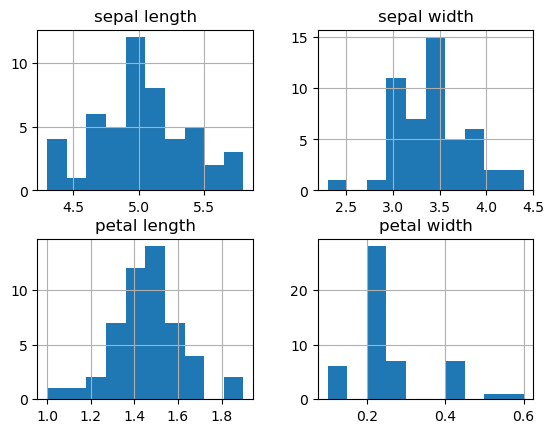

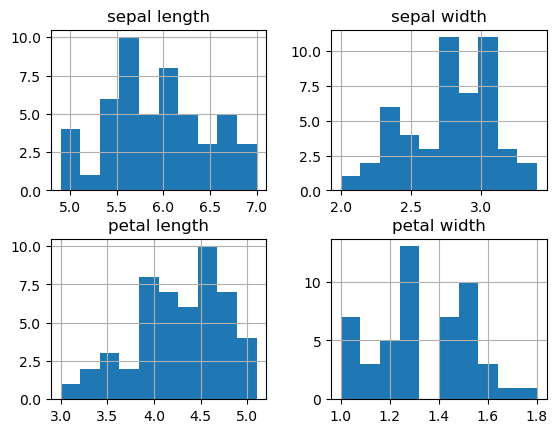

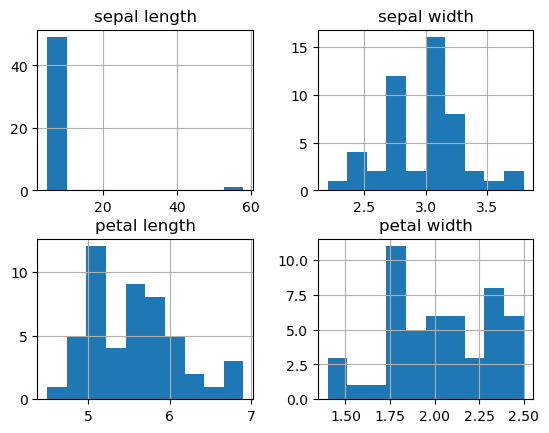

In [38]:
# Now plot a histogram per level. 
iris.groupby("class").hist()

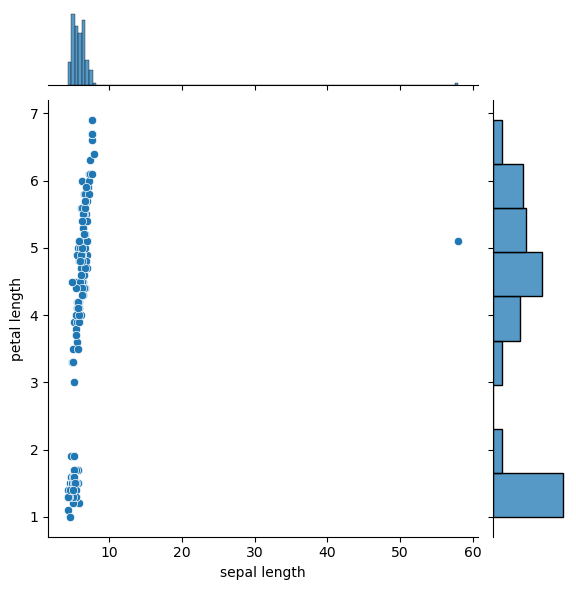

In [40]:
# let's try to find out if there's a linear relationship between 
# sepal and petal lengths and if there's some sense in manipulating
# the outlier of 58 centimers.
import seaborn as sns
sns.jointplot(x=iris['sepal length'], y=iris['petal length'])
# Just looking at the scatter plot, yes there's a strong linear relationship
# but it doesn't express itself numerically. 

In [47]:
# How strong is the linear relationship between petal length and sepal length?
# Calculate the Pearson correlation coefficient rho. One indicates a perfect 
# linear relationship, zero no linear relationship at all. 
import numpy as np

iris_rho = iris["sepal length"].corr(iris["petal length"])
iris_rho
np.round(iris_rho,2)

0.23

In [48]:
# It is reasonable to assume that 58 centimers is the cause of a data entry 
# msitake. Probably the sepal lenght should be 5.8 centimers.
# Remember it concerned row 143.
iris.loc[143, "sepal length"] = 5.8
iris.loc[143]
iris_rho = iris["sepal length"].corr(iris["petal length"])
iris_rho
np.round(iris_rho,2)
# Seems to have been a sensible "repair" action!

0.87

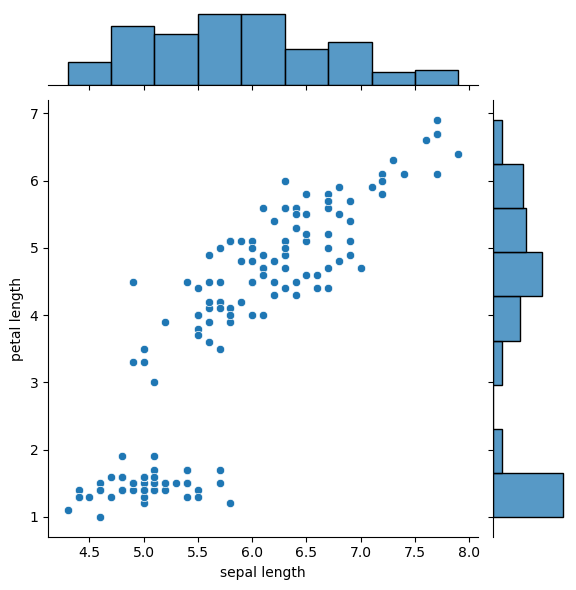

In [49]:
# Plot again to check. Don't let the plot fool you. Totally different scaling 
# of the x-axis may cause you to think there's no strong linear realationship.
sns.jointplot(x=iris['sepal length'], y=iris['petal length'])

In [113]:
# Let's wrap up with a nice overview of correlations between all the nunmeric 
# features.
# Create a correlation matrix executing instance method corr(), than plot it 
# in a heatmap (colors express correlation).

numcols = ["petal width" , "petal length", "sepal width", "sepal length"]
iris_num = iris.reindex(columns = numcols)

# or iris_num = iris.drop("class", axis = 1) or ...

# Next we create a correlation matrix.
cormat = iris_num.corr()
cormat

,petal width,petal length,sepal width,sepal length
petal width,1.000000,0.962757,-0.356862,0.817954
petal length,0.962757,1.000000,-0.420795,0.871754
sepal width,-0.356862,-0.420795,1.000000,-0.109532
sepal length,0.817954,0.871754,-0.109532,1.000000


<Axes: >

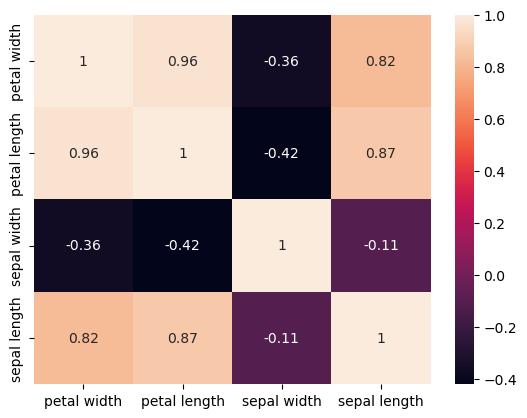

In [114]:
# Finally we plot the correlation data in a heatmap format
sns.heatmap(cormat, annot = True)

In [51]:
# Can we get more information from the data visualizing more creatively now
# that the data are in better shape? One question would be if it is possible 
# to separate classes from one and another on the basis of the feature data
# available.
# We'll use a more powerful package to create visualizations hopefully providing
# us this kind of information.
import matplotlib.pylab as plt
from matplotlib.colors import ListedColormap

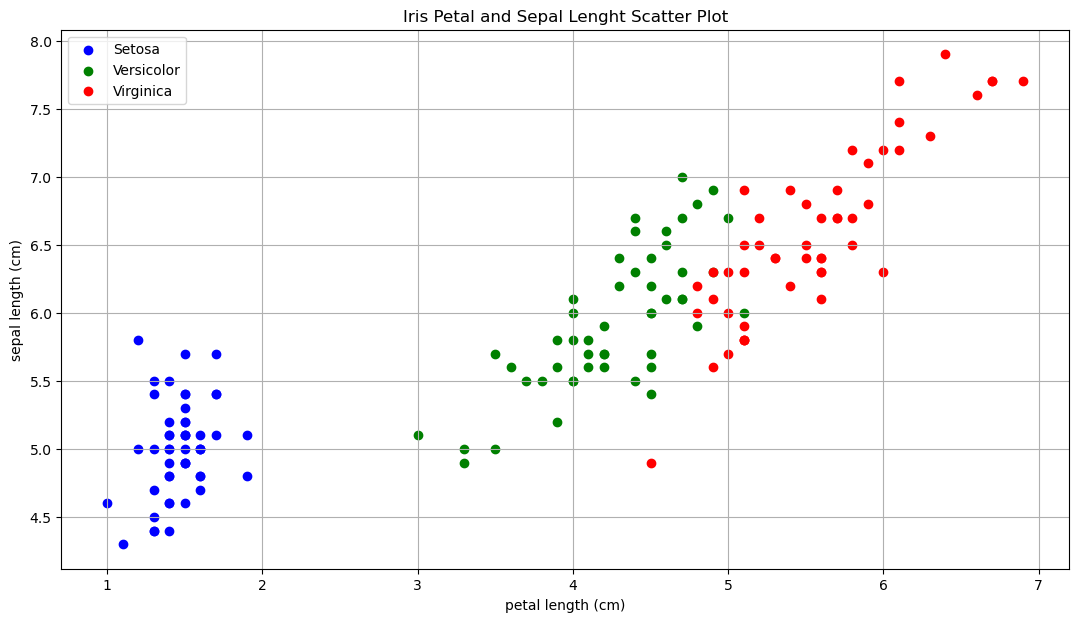

In [70]:
# Let's focus on the same two features of which we calculated the Pearson linear correlation 
# coefficient rho.
setosa = iris[iris["class"] == "Iris-setosa"]
versicolor = iris[iris["class"] =='Iris-versicolor']
virginica = iris[iris["class"] =='Iris-virginica']

fig, ax = plt.subplots()
fig.set_size_inches(13, 7) # adjusting the length and width of plot

# lables and scatter points
ax.scatter(setosa['petal length'], setosa['sepal length'], label="Setosa", facecolor="blue")
ax.scatter(versicolor['petal length'], versicolor['sepal length'], label="Versicolor", facecolor="green")
ax.scatter(virginica['petal length'], virginica['sepal length'], label="Virginica", facecolor="red")


ax.set_xlabel("petal length (cm)")
ax.set_ylabel("sepal length (cm)")
ax.grid()
ax.set_title("Iris Petal and Sepal Lenght Scatter Plot")
ax.legend()

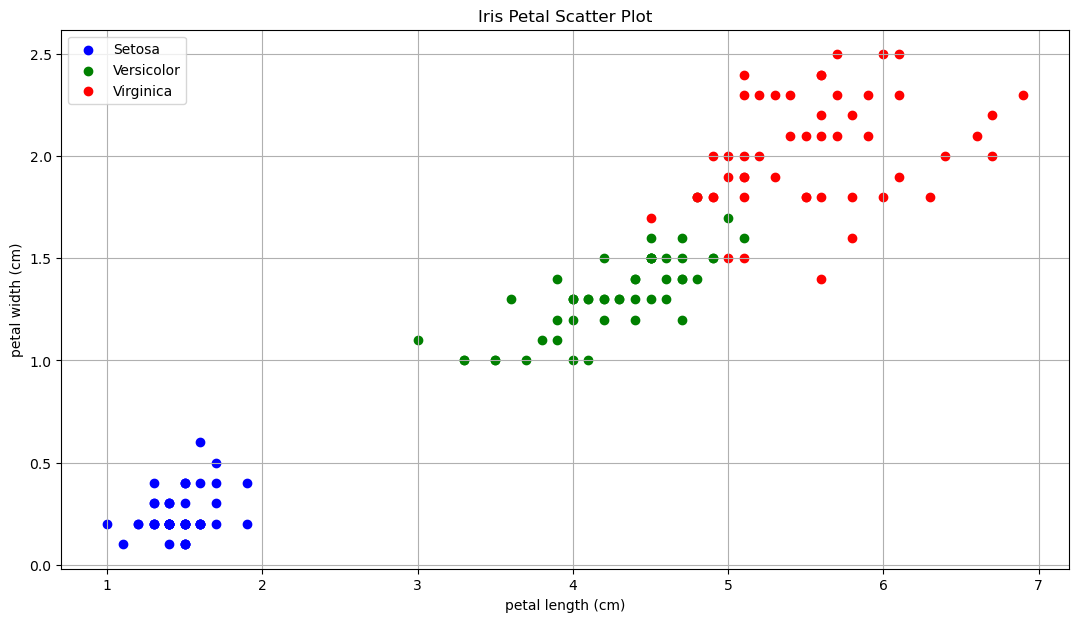

In [72]:
# Classes seem to separe reasonably well in this two dimensional space.
# Give it a try using just the petals.
# labels and scatter points
fig, ax = plt.subplots()
fig.set_size_inches(13, 7) 

ax.scatter(setosa['petal length'], setosa['petal width'], label="Setosa", facecolor="blue")
ax.scatter(versicolor['petal length'], versicolor['petal width'], label="Versicolor", facecolor="green")
ax.scatter(virginica['petal length'], virginica['petal width'], label="Virginica", facecolor="red")


ax.set_xlabel("petal length (cm)")
ax.set_ylabel("petal width (cm)")
ax.grid()
ax.set_title("Iris Petal Scatter Plot")
ax.legend()


In [102]:
# An even better separation of classes is visible using petal data! We'll try 
# to create a basic predictive claasification model of type k-Nearest Neighbor.

# Creating any kind model and testing its performance at minimum requires
# us to create training data and test datasets. The test data is kept unseen 
# by de training process. This way the test set judges statistically (more) 
# reliable what the true performance of the model actually is. Train the model 
# using training data, test it on data kept unseen by the training process.

# We split the dataset in training and target subsets by setting a certain 
# percentage of the data apart just for testing the model once 
# (fi 40%). 
# Package sklearn.model_selection offers function train_test_split
# helping us out, doing the "heavy weight lifting" for us.
from sklearn.model_selection import train_test_split
y = iris['class']
x = iris.drop('class', axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4)
# Checking the shapes of the sets
x_train.shape, y_train.shape, x_test.shape, y_test.shape
# 90 training samples, 60 test samples

((90, 4), (90,), (60, 4), (60,))

## k-Nearest Neighbor classification

Conceptually a "k" Nearest Neighbour classifyer is an extremely simple type of classifyer. It executes what in English is proverbially stated as "Birds of a feather flock together". The idea implemented in this classifyer is that objects of the same kind, look alike in terms of their features. Technically data points (our Iris flowers) are loaded in a two dimensional space ("petal length", "petal width"). 

When trying to predict the outcome (the kind of Iris flower) using a particular test example, the test example is also positioned in the same two dimensional space and its "k" (fi "k" = 5, 7 or 11 or ..., note: the actual choice of the "k" value matters a lot, tuning the most basic k-NN model implies tuning the "k" value for optimal classification performance) nearest neighbors are used to determine the class of the test case (choice is made on the basis of the majority vote). The test case its real class level is also known (y_test), so the performance of the classifyer can be determined by comparing the real with the predicted class level. 

The distance to all the "k" neighbors can be calculated easily for instance applying the Pythagoras Theorem (in two dimensions). List the distances in ascending order and pick the first "k" elements (5, 11 whatever the "k" value) and determine the majority class level. That's the predicted class level!

In [103]:
# Import the subpackage neighbors part of the complete sklearn (scikit-learn) package 
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(n_neighbors = 11)

In [104]:
# Fit is the training function. Fortunately sklearn is very consistent wahetever classifyer you use, always
# the same structure is used.
clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [105]:
# Function predict is used on a data frame containing one row of data (of one of the iris flowers)
clf.predict(pd.DataFrame([[6.3, 2.7, 5.5, 1.5]], columns = ["sepal length", "sepal width", "petal length", "petal width"]))

array(['Iris-virginica'], dtype=object)

In [106]:
# The score function is used to calculate the percentage correctly predicted flowers species.
# Beware, the classifyer predicts the training set. The training set is the set about which the model
# has knowledge. One of the neighbours taken into consideration is the row itself (so the majority vote includes 
# a vote about itself). If "k" is chosen to be lower, the difference becomes bigger.

# Using the unseen test set is a more reliable way to judge the performance.  
clf.score(x_train, y_train)

0.9666666666666667

In [107]:
# The score comes close to the train set score. The reason is that of eleven votes only one concerns itself, the other ten are independent. 
clf.score(x_test, y_test)

0.9833333333333333

In [108]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(n_neighbors = 1)
clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [109]:
# Classifying the training set on a model trained with "k" set to one is
# fooling yourself. The nearest neighbour in that case is # same as the row 
# itself already present in memory. Predicting all samples correct is not 
# very difficult if the nearest neighbour is in fact the same entity!
clf.score(x_train, y_train)

1.0

In [110]:
# At least now the neighbour is another entity! Because the test set is not already positioned in the multidimensional space.
clf.score(x_test, y_test)

0.9833333333333333